## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
#  Basic Import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import  CatBoostRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
df.columns=df.columns.str.strip()
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
X=df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:       ",end=' ')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:      ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:       ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female ' 'male   ']
Categories in 'race_ethnicity' variable:      ['group B        ' 'group C        ' 'group A        ' 'group D        '
 'group E        ']
Categories in 'parental level of education' variable:        ["bachelor's degree           " 'some college                '
 "master's degree             " "associate's degree          "
 'high school                 ' 'some high school            ']
Categories in 'lunch' variable:       ['standard     ' 'free/reduced ']
Categories in 'test preparation course' variable:        ['none                    ' 'completed               ']


In [9]:
y=df['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
# Create Column Transformer with 3 Types of Transformers 
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features)
],remainder="passthrough")

In [13]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [11]:
X=preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 14)

In [13]:
# Separate dataset into train and test 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=48)
X_train.shape,X_test.shape

((800, 14), (200, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)

    return mae,rmse,r2

In [16]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)# Train Model

    # Make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Make Evaluation 
    mae,rmse,r2=evaluate_model(y_train,y_train_pred)
    mae_test,rmse_test,r2_test=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(r2_test)

    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2))

    print("+++++++++++++++++++++++++++++++++++++")

    print("Model Performance for Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))

    print("*"*55)
    print("\n")


Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.3356
- Mean Absolute Error: 4.2582
- R2 Score: 0.8773
+++++++++++++++++++++++++++++++++++++
Model Performance for Testing Set
- Root Mean Squared Error: 5.2883
- Mean Absolute Error: 4.1904
- R2 Score: 0.8719
*******************************************************


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.5977
- Mean Absolute Error: 5.2098
- R2 Score: 0.8123
+++++++++++++++++++++++++++++++++++++
Model Performance for Testing Set
- Root Mean Squared Error: 6.3452
- Mean Absolute Error: 5.0066
- R2 Score: 0.8156
*******************************************************


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.3360
- Mean Absolute Error: 4.2582
- R2 Score: 0.8772
+++++++++++++++++++++++++++++++++++++
Model Performance for Testing Set
- Root Mean Squared Error: 5.2903
- Mean Absolute Error: 4.1834
- R2 Score: 0.8718
***********************************

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.871917
2,Ridge,0.871820
7,CatBoost Regressor,0.837637
8,AdaBoost Regressor,0.836518
5,Random Forest Regressor,0.829745
1,Lasso,0.815605
6,XGBRegressor,0.791584
3,K-Neighbors Regressor,0.781174
4,Decision Tree Regressor,0.656090


## Linear Regression

In [18]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the Model is %.2f"%score)

Accuracy of the Model is 87.19


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

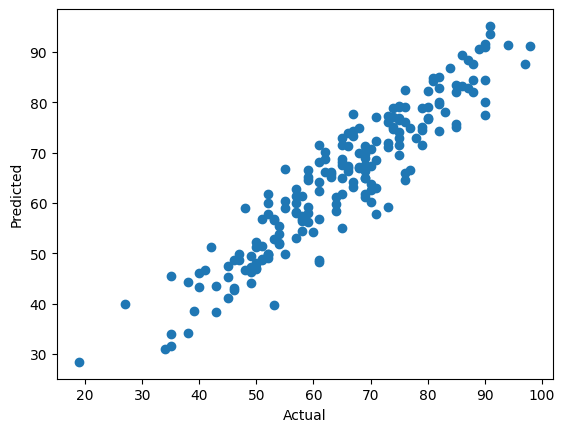

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

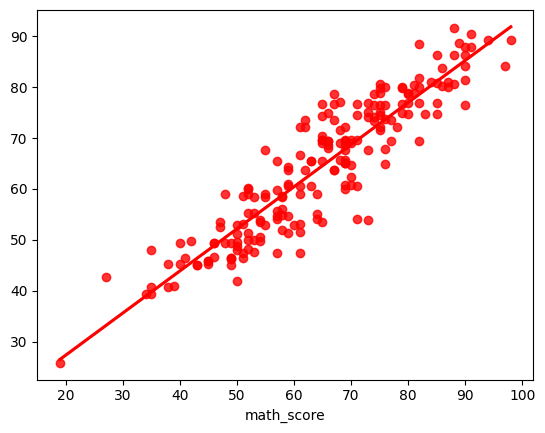

In [22]:
#  Setting ci=None,removes the confidence interval shading around the regression line, leaving only the line itself.
#  This can be useful when you want a cleaner plot without the uncertainty shading.
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='red') # ci is Confidence Interval

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
847,64,58.305625,5.694375
474,90,80.095118,9.904882
853,82,74.402118,7.597882
540,75,71.560179,3.439821
244,75,76.838474,-1.838474
...,...,...,...
606,85,75.066718,9.933282
749,87,88.401272,-1.401272
91,27,39.889387,-12.889387
216,83,78.050333,4.949667
